In [1]:
from Functions.functions import *
from Functions.chernoff import *

import warnings
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from sklearn.metrics.cluster import normalized_mutual_info_score

import numpy as np
import networkx as nx

from scipy.sparse.linalg import svds

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Density

### (1) General density range

In [3]:
n = 1000
sparsity = np.linspace(0.05, 0.6, 12)
iteration = 50  # Number of iterations per sparsity level

sizes = [500, 500]
clusters, labels = make_labels(n, sizes)

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'K-Means'
direction = False


# Call the function
results = process_sparsity_iterations_CI(n, labels, iteration, sizes, P_matrix, sparsity, d, k, direction, method)

# Unpack results
( 
    dense_k2_kmeans_undir_density,
    CI_ase_k2_kmeans_undir_density, CI_dase_k2_kmeans_undir_density,
    std_ase_k2_kmeans_undir_density, std_dase_k2_kmeans_undir_density
    
) = results

Processing:   0%|          | 0/600 [00:00<?, ?it/s]

Processing completed.


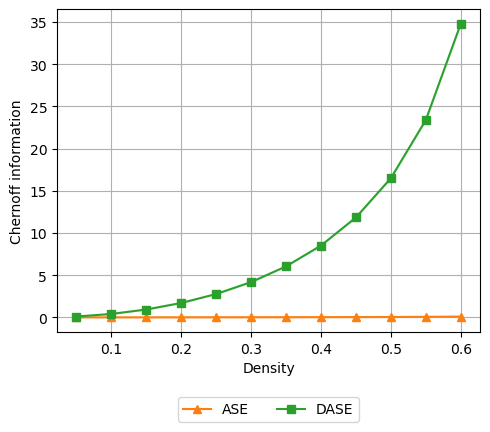

In [4]:
plt.figure(figsize=(5, 4.5))

plt.plot(dense_k2_kmeans_undir_density, CI_ase_k2_kmeans_undir_density, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense_k2_kmeans_undir_density, np.array(CI_ase_k2_kmeans_undir_density) - np.array(std_ase_k2_kmeans_undir_density),
                    np.array(CI_ase_k2_kmeans_undir_density) + np.array(std_ase_k2_kmeans_undir_density), color='#ff7f0e', alpha=0.1)

plt.plot(dense_k2_kmeans_undir_density, CI_dase_k2_kmeans_undir_density, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense_k2_kmeans_undir_density, np.array(CI_dase_k2_kmeans_undir_density) - np.array(std_dase_k2_kmeans_undir_density),
                    np.array(CI_dase_k2_kmeans_undir_density) + np.array(std_dase_k2_kmeans_undir_density), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Chernoff information')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

### (2) Sparse density range

In [5]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [500, 500]
clusters, labels = make_labels(n, sizes)

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'K-Means'
direction = False


# Call the function
results = process_sparsity_iterations_CI(n, labels, iteration, sizes, P_matrix, sparsity, d, k, direction, method)

# Unpack results
( 
    dense_k2_kmeans_undir_density2,
    CI_ase_k2_kmeans_undir_density2, CI_dase_k2_kmeans_undir_density2,
    std_ase_k2_kmeans_undir_density2, std_dase_k2_kmeans_undir_density2
    
) = results

Processing:   0%|          | 0/500 [00:00<?, ?it/s]

Processing completed.


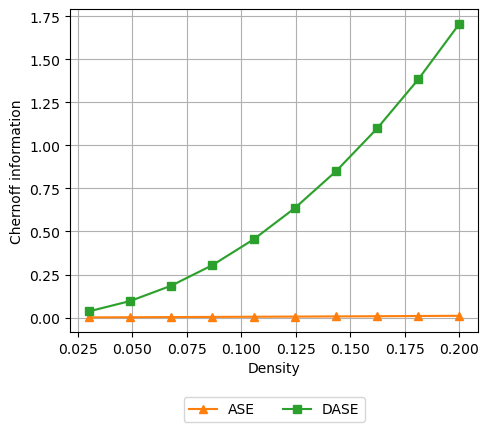

In [6]:
plt.figure(figsize=(5, 4.5))

plt.plot(dense_k2_kmeans_undir_density2, CI_ase_k2_kmeans_undir_density2, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense_k2_kmeans_undir_density2, np.array(CI_ase_k2_kmeans_undir_density2) - np.array(std_ase_k2_kmeans_undir_density2),
                    np.array(CI_ase_k2_kmeans_undir_density2) + np.array(std_ase_k2_kmeans_undir_density2), color='#ff7f0e', alpha=0.1)

plt.plot(dense_k2_kmeans_undir_density2, CI_dase_k2_kmeans_undir_density2, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense_k2_kmeans_undir_density2, np.array(CI_dase_k2_kmeans_undir_density2) - np.array(std_dase_k2_kmeans_undir_density2),
                    np.array(CI_dase_k2_kmeans_undir_density2) + np.array(std_dase_k2_kmeans_undir_density2), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Chernoff information')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
plt.figure(figsize=(5, 4.5))

plt.plot(dense_k2_gmm_dir_density, CI_ase_k2_gmm_dir_density, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense_k2_gmm_dir_density, np.array(CI_ase_k2_gmm_dir_density) - np.array(std_ase_k2_gmm_dir_density),
                    np.array(CI_ase_k2_gmm_dir_density) + np.array(std_ase_k2_gmm_dir_density), color='#ff7f0e', alpha=0.1)

plt.plot(dense_k2_gmm_dir_density, CI_dase_k2_gmm_dir_density, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense_k2_gmm_dir_density, np.array(CI_dase_k2_gmm_dir_density) - np.array(std_dase_k2_gmm_dir_density),
                    np.array(CI_dase_k2_gmm_dir_density) + np.array(std_dase_k2_gmm_dir_density), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Chernoff information')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'dense_k2_gmm_dir_density' is not defined

<Figure size 500x450 with 0 Axes>

In [ ]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [200, 800]
clusters, labels = make_labels(n, sizes)

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'K-Means'
direction = True


# Call the function
results = process_sparsity_iterations_CI(n, labels, iteration, sizes, P_matrix, sparsity, d, k, direction, method)

# Unpack results
( 
    dense_k2_gmm_dir_density2,
    CI_ase_k2_gmm_dir_density2, CI_dase_k2_gmm_dir_density2,
    std_ase_k2_gmm_dir_density2, std_dase_k2_gmm_dir_density2
    
) = results

In [ ]:
plt.figure(figsize=(5, 4.5))

plt.plot(dense_k2_gmm_dir_density2, CI_ase_k2_gmm_dir_density2, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense_k2_gmm_dir_density2, np.array(CI_ase_k2_gmm_dir_density2) - np.array(std_ase_k2_gmm_dir_density2),
                    np.array(CI_ase_k2_gmm_dir_density2) + np.array(std_ase_k2_gmm_dir_density2), color='#ff7f0e', alpha=0.1)

plt.plot(dense_k2_gmm_dir_density2, CI_dase_k2_gmm_dir_density2, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense_k2_gmm_dir_density2, np.array(CI_dase_k2_gmm_dir_density2) - np.array(std_dase_k2_gmm_dir_density2),
                    np.array(CI_dase_k2_gmm_dir_density2) + np.array(std_dase_k2_gmm_dir_density2), color='#2ca02c', alpha=0.1)

plt.xlabel('density2')
plt.ylabel('Chernoff information')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [200, 800]
clusters, labels = make_labels(n, sizes)

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'K-Means'
direction = True


# Call the function
results = process_sparsity_iterations_CI(n, labels, iteration, sizes, P_matrix, sparsity, d, k, direction, method)

# Unpack results
( 
    dense_k2_gmm_dir_density3,
    CI_ase_k2_gmm_dir_density3, CI_dase_k2_gmm_dir_density3,
    std_ase_k2_gmm_dir_density3, std_dase_k2_gmm_dir_density3
    
) = results

In [ ]:
plt.figure(figsize=(5, 4.5))

plt.plot(dense_k2_gmm_dir_density3, CI_ase_k2_gmm_dir_density3, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense_k2_gmm_dir_density3, np.array(CI_ase_k2_gmm_dir_density3) - np.array(std_ase_k2_gmm_dir_density3),
                    np.array(CI_ase_k2_gmm_dir_density3) + np.array(std_ase_k2_gmm_dir_density3), color='#ff7f0e', alpha=0.1)

plt.plot(dense_k2_gmm_dir_density3, CI_dase_k2_gmm_dir_density3, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense_k2_gmm_dir_density3, np.array(CI_dase_k2_gmm_dir_density3) - np.array(std_dase_k2_gmm_dir_density3),
                    np.array(CI_dase_k2_gmm_dir_density3) + np.array(std_dase_k2_gmm_dir_density3), color='#2ca02c', alpha=0.1)

plt.xlabel('density3')
plt.ylabel('Chernoff information')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

# Different Group Ratio

In [8]:
# directed
N = 1000
sparsity = [0.3]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
              [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

direction = False
method = 'K-Means'

# Call the function
results = process_group_ratio_iterations_CI(N, sparsity, iteration, size_ratio, P_matrix, d, k, direction, method)

# Unpack results
(
    dense_k2_kmeans_undir_ratio, ratio_k2_kmeans_undir_ratio,
    CI_ase_k2_kmeans_undir_ratio, CI_dase_k2_kmeans_undir_ratio,
    std_ase_k2_kmeans_undir_ratio, std_dase_k2_kmeans_undir_ratio
    
) = results

Processing:   0%|          | 0/450 [00:00<?, ?it/s]

Processing completed.


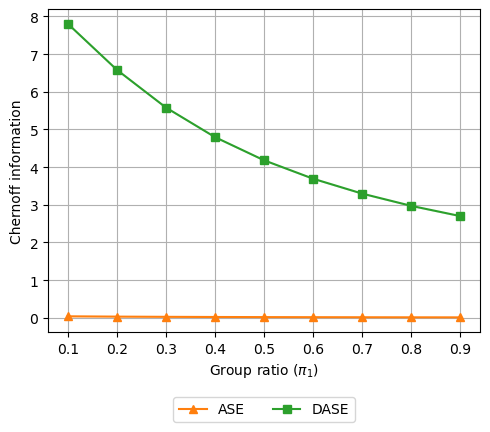

In [9]:
plt.figure(figsize=(5, 4.5))

plt.plot(ratio_k2_kmeans_undir_ratio, CI_ase_k2_kmeans_undir_ratio, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(ratio_k2_kmeans_undir_ratio, np.array(CI_ase_k2_kmeans_undir_ratio) - np.array(std_ase_k2_kmeans_undir_ratio),
                    np.array(CI_ase_k2_kmeans_undir_ratio) + np.array(std_ase_k2_kmeans_undir_ratio), color='#ff7f0e', alpha=0.1)

plt.plot(ratio_k2_kmeans_undir_ratio, CI_dase_k2_kmeans_undir_ratio, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(ratio_k2_kmeans_undir_ratio, np.array(CI_dase_k2_kmeans_undir_ratio) - np.array(std_dase_k2_kmeans_undir_ratio),
                    np.array(CI_dase_k2_kmeans_undir_ratio) + np.array(std_dase_k2_kmeans_undir_ratio), color='#2ca02c', alpha=0.1)

plt.xlabel(r'Group ratio ($\pi_1$)')
plt.ylabel('Chernoff information')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

#### Probability matrix Check

In [10]:
def process_group_ratio_iterations_CI_test(N, sparsity, iteration, size_ratio, P_matrix, d, k, direction, method):
    """
    Process SBM network iterations over different sparsity levels, computing various metrics.

    Parameters:
    - X: Covariate matrix
    - labels: True labels for evaluation
    - sparsity_list: List of sparsity values to iterate over
    - iteration: Number of iterations per sparsity value
    - relsize: Relative size of each cluster
    - relw12: Relative weights within blocks
    - relb: Relative weights between blocks
    - beta: Parameters for ACSBM network generation
    - k: Number of clusters

    Returns:
    - Tuple containing lists of results for density, NMI scores, standard deviations, alphas, and computation times
    """


    # Progress bar setup
    progress_bar = tqdm(total=len(size_ratio) * iteration, desc="Processing")
                
                

    # Iterate over each sparsity value
    for sizes in size_ratio:
        
        # Ground truth label
        cluster_sizes = [int(N * s) for s in sizes]
        clusters, labels = make_labels(int(N), cluster_sizes)
        
        relw_setting = np.diag(P_matrix)
        relw_setting = relw_setting.tolist()
        relb_setting = P_matrix.tolist()

        relw11, relw22, relb12, relb21 = calculate_relw_relb(N, cluster_sizes, P_matrix, k, sparsity, iteration)
        
        P = np.array([[relw11, relb12], [relb21, relw22]])
        P = P.reshape(2, 2)

        print("group ratio: {}".format(np.round(cluster_sizes[0]/N,1)))
        print(np.round(P,2))
        print("")


        progress_bar.update(1)
        
    progress_bar.close()
    print("Processing completed.")

In [11]:
N = 1000
sparsity = [0.3]
iteration = 1  # Number of iterations per sparsity level
size_ratio = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
              [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

direction = False
method = 'K-Means'

# Call the function
process_group_ratio_iterations_CI_test(N, sparsity, iteration, size_ratio, P_matrix, d, k, direction, method)

Processing:   0%|          | 0/9 [00:00<?, ?it/s]

group ratio: 0.1
[[0.83 0.5 ]
 [0.5  0.25]]

group ratio: 0.2
[[0.71 0.42]
 [0.42 0.21]]

group ratio: 0.3
[[0.61 0.37]
 [0.37 0.18]]

group ratio: 0.4
[[0.54 0.32]
 [0.32 0.16]]

group ratio: 0.5
[[0.48 0.29]
 [0.29 0.14]]

group ratio: 0.6
[[0.43 0.26]
 [0.26 0.13]]

group ratio: 0.7
[[0.39 0.23]
 [0.23 0.12]]

group ratio: 0.8
[[0.36 0.21]
 [0.21 0.11]]

group ratio: 0.9
[[0.33 0.2 ]
 [0.2  0.1 ]]

Processing completed.


In [12]:
n = 1000
cluster_sizes = [100, 900]
P = np.array([[0.83, 0.5], [0.5, 0.25]])
direction = False
i = 0

G = nx.stochastic_block_model(cluster_sizes, P, directed = direction, seed = i)
nx.density(G)

0.30045245245245245

In [13]:
n = 1000
cluster_sizes = [900, 100]
P = np.array([[0.33, 0.2], [0.2, 0.1]])
direction = False
i = 0

G = nx.stochastic_block_model(cluster_sizes, P, directed = direction, seed = i)
nx.density(G)

0.3042022022022022